# Loss Function Effect on Different Distributions

For this exercise we are going to simulate different time series using the sinusoidal form for the deterministic term and using a different distributions in which the average and the median are very different for the noise term. Then, we fit a simple dense neural network with different loss functions in order to fit the model to the data and then recover the error distribution and analyze the mean and the median.

Before proceeding, we import the necessary modules and packages:

In [1]:
# Own Modules

from src.ErrorModelling4TS.ts_simulator.distributions import *
from src.ErrorModelling4TS.ts_simulator.simulator import *
from src.ErrorModelling4TS.ts_simulator.utils import *
from src.ErrorModelling4TS.graphics.classes import *
from src.ErrorModelling4TS.graphics.utils import *
from project_utils import *

# Other modules

import numpy as np
import pandas as pd

# Objects

simul = TimeSeriesSimulator()
plotter = PlotSimulatedTS()

**No Stochastic Process**

We simulate the time series with no error term. In this case, the time series will be a function of the form:

$$f(t)=\sin(0.05t+1)$$

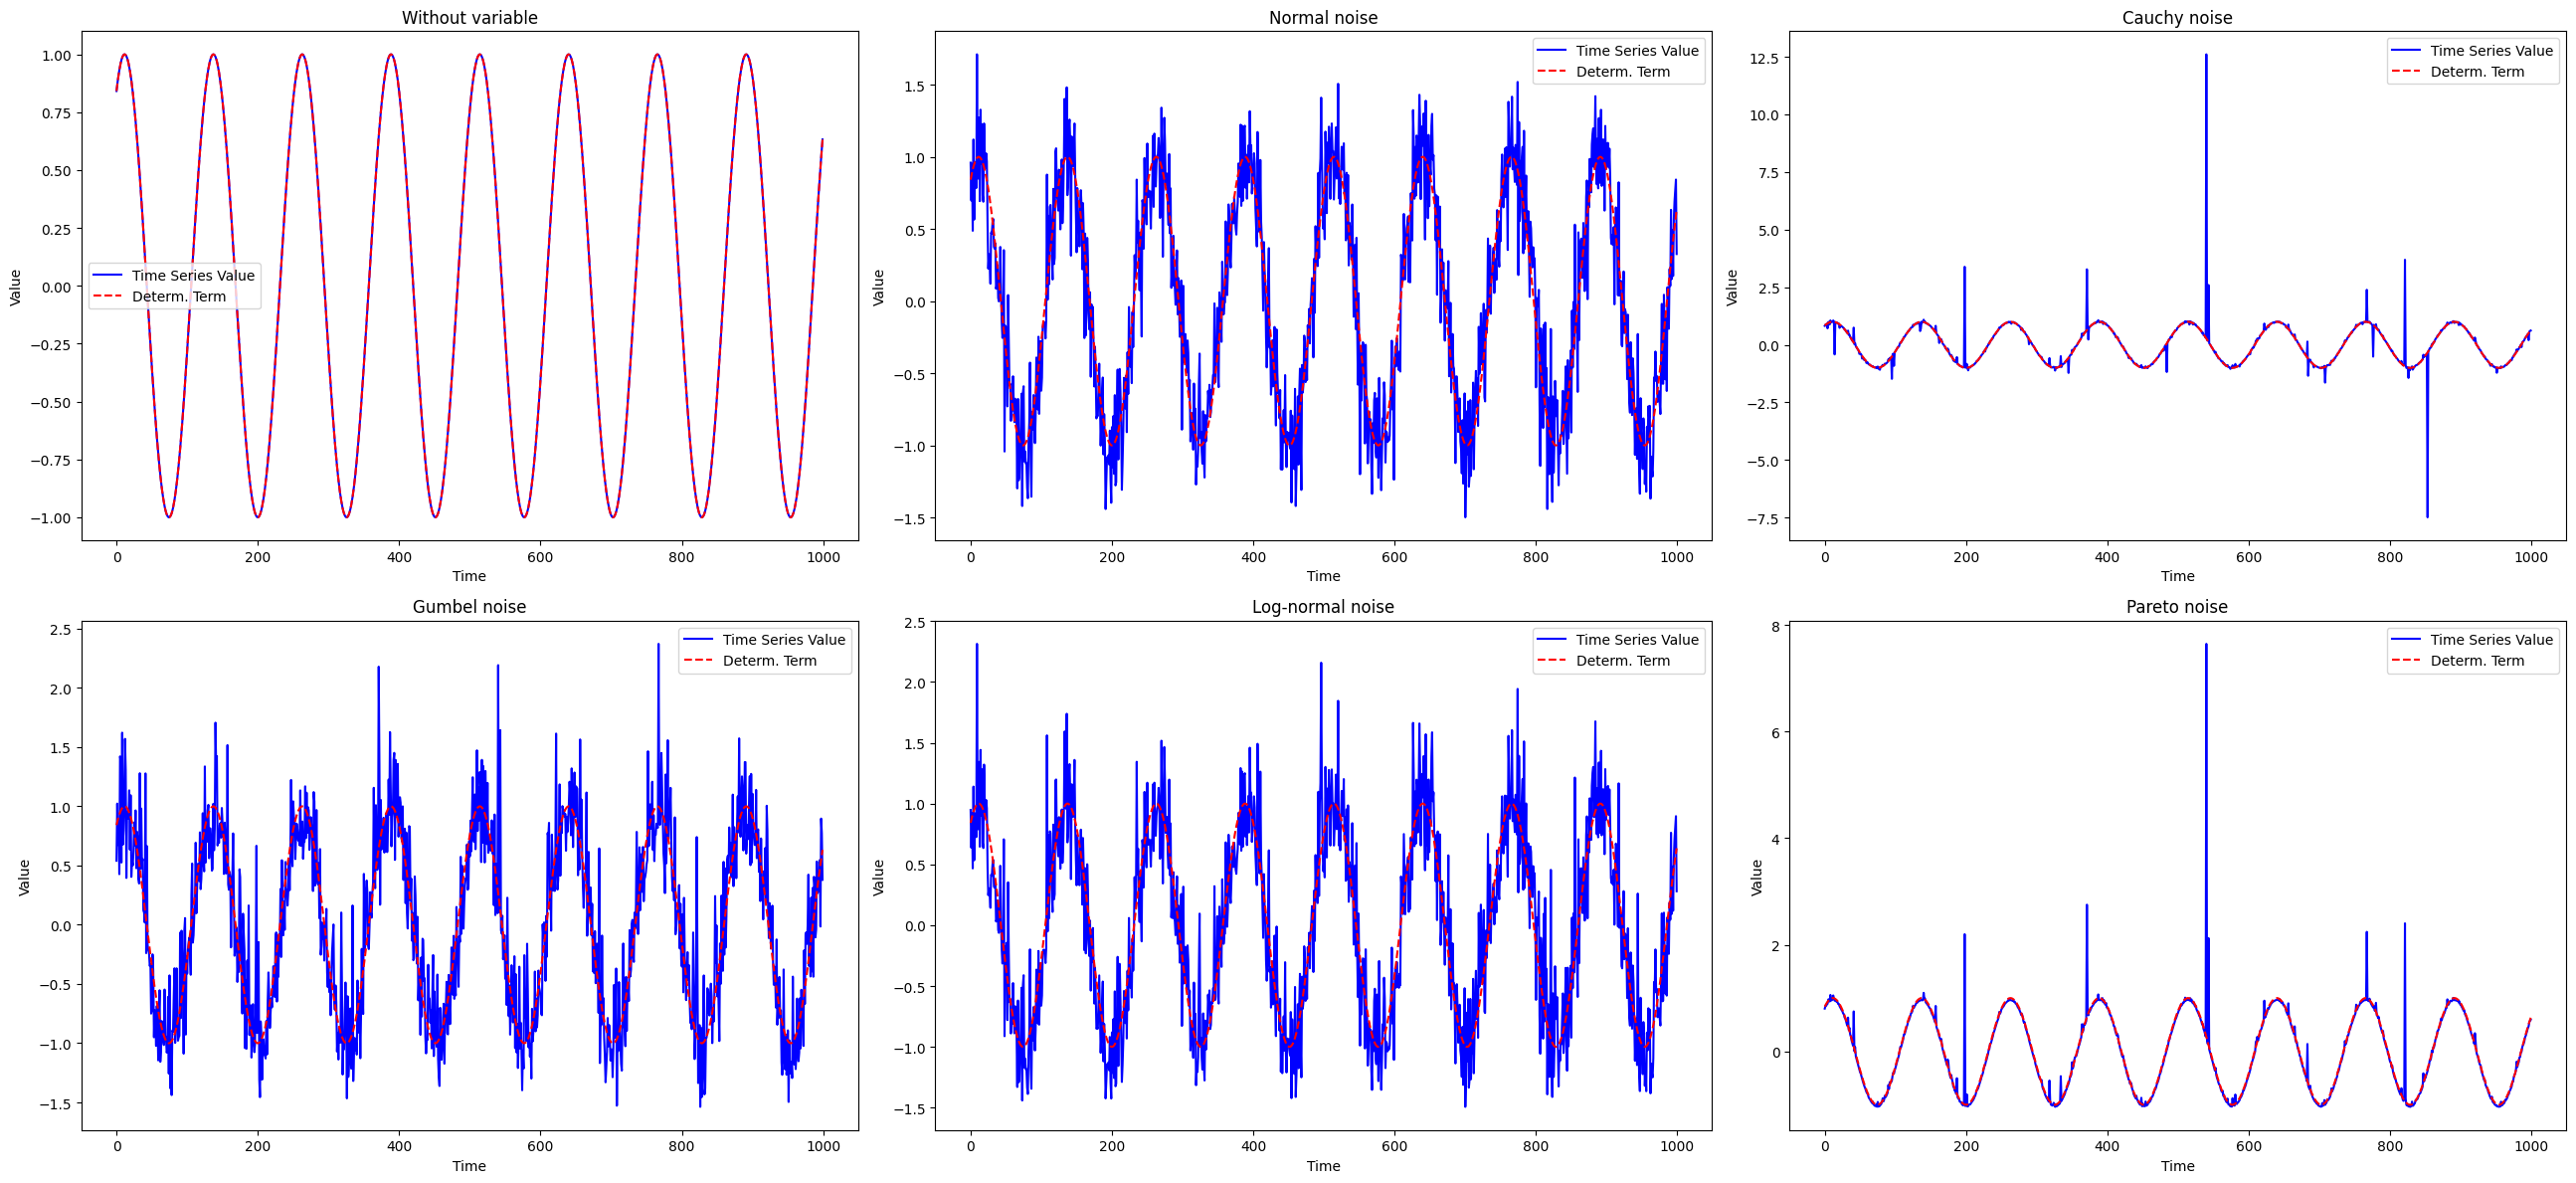

In [2]:
n = 1000
params = {"A": 1, "B":0.05, "C":1}

normal = NormalDist({"loc": 0, "scale":0.25})
theory_normal = normal.theory()
cauchy = CauchyDist({"loc": 0, "scale":0.01})
theory_cauchy = cauchy.theory()
gumbel = GumbelDist({"loc": 3, "scale":0.25})
theory_gumbel = gumbel.theory()
lognorm = LogNormalDist({"loc": 0, "scale":0.3})
theory_lognorm = lognorm.theory()
pareto = ParetoDist({"xm": 0.01, "alpha":1.25})
theory_pareto = pareto.theory()

simul = TimeSeriesSimulator()

det_series = pd.DataFrame(sinForm(params=params, x=range(0, n)), index=range(0, n), columns=["Determ"])
noise_normal = pd.DataFrame(simul.simulate_noise(n=n, dist=normal, seed=12), index=range(0, n), columns=["Noise"])
noise_cauchy = pd.DataFrame(simul.simulate_noise(n=n, dist=cauchy, seed=12), index=range(0, n), columns=["Noise"])
noise_gumbel = pd.DataFrame(simul.simulate_noise(n=n, dist=gumbel, seed=12), index=range(0, n), columns=["Noise"])
noise_lognorm = pd.DataFrame(simul.simulate_noise(n=n, dist=lognorm, seed=12), index=range(0, n), columns=["Noise"])
noise_pareto = pd.DataFrame(simul.simulate_noise(n=n, dist=pareto, seed=12), index=range(0, n), columns=["Noise"])

ts_orig = simul.get_ts(determ_series=det_series, noise_series=pd.Series([0]*len(det_series.index)), constant_determ=0,constant_noise=0)
ts_norm = simul.get_ts(determ_series=det_series, noise_series=noise_normal, constant_determ=0,constant_noise=-theory_normal["mean"])
ts_cauchy = simul.get_ts(determ_series=det_series, noise_series=noise_cauchy, constant_determ=0,constant_noise=0)
ts_gumbel = simul.get_ts(determ_series=det_series, noise_series=noise_gumbel, constant_determ=0,constant_noise=-theory_gumbel["mean"])
ts_lognorm = simul.get_ts(determ_series=det_series, noise_series=noise_lognorm, constant_determ=0,constant_noise=-theory_lognorm["mean"])
ts_pareto = simul.get_ts(determ_series=det_series, noise_series=noise_pareto, constant_determ=0,constant_noise=-theory_pareto["mean"])

list_series = [ts_orig, ts_norm, ts_cauchy, ts_gumbel, ts_lognorm, ts_pareto]
list_plots = []

for series in list_series:
    list_plots.append(plotter.plot_sim_ts(series, errors = None))

show_figs_grid(list_plots,titles=["Without variable","Normal noise","Cauchy noise","Gumbel noise","Log-normal noise","Pareto noise"],fig_size=(26,12))

Then, we fit a dense neural network to our data. The architecture of this neural network is the follwoing:

- 1 linear input layer with 10 units (sequence length; can be changed)
- 1 ReLU hidden layer with 128 units
- 1 linear output layer with 1 unit
- Batch size of 16
- 50 epochs for training

We use an ADAM optimizer and we try 3 different loss funcions: the L1, the L2 and the Huber losses.

In [3]:
loss_functions = {
    "L1": "mae",
    "L2": "mse",
    "Huber": keras.losses.Huber(delta=0.5)
}

seq_length = 10
batch_size = 16
epochs = 50
learning_rate = 0.01

In [4]:
results_df, predictions_dict = train_and_evaluate(list_series, get_series_loss)


Processing Series 1...


Training with L1 loss...

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Training with L2 loss...

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 768us/step

Training with Huber loss...

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 

Processing Series 2...


Training with L1 loss...

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step

Training with L2 loss...

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  

Training with Huber loss...

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step

Processing Series 3...


Training with L1 loss...

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step

Training with L2 loss...

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step

Training with Huber loss...

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 846us/step

Processing Series 4...


Training with L1 loss...

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step

Training with L2 loss...

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step

Training with Huber loss...

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  

Processing Series 5...


Training with L1 loss...

62/62 ━━━━━━━━━━━━━━━━━

In [5]:
print(results_df)

     Series Loss Function       MAE        MAPE     MedAE       MSE      RMSE  \
0   Without            L1  0.009353    3.071249  0.010464  0.000104  0.010175   
1   Without            L2  0.002471    1.515061  0.001643  0.000010  0.003201   
2   Without         Huber  0.001277    0.584887  0.001218  0.000002  0.001478   
3    Normal            L1  0.226696  148.622288  0.182669  0.084314  0.290368   
4    Normal            L2  0.222618  140.386911  0.190000  0.076106  0.275873   
5    Normal         Huber  0.218516  162.952681  0.180269  0.076125  0.275908   
6    Cauchy            L1  0.095897   31.591278  0.027537  0.277231  0.526527   
7    Cauchy            L2  0.136769   54.457346  0.068033  0.280422  0.529549   
8    Cauchy         Huber  0.106166   50.185786  0.040393  0.275464  0.524846   
9    Gumbel            L1  0.254524  180.307738  0.197685  0.113502  0.336900   
10   Gumbel            L2  0.246413  156.833596  0.200303  0.103808  0.322192   
11   Gumbel         Huber  0

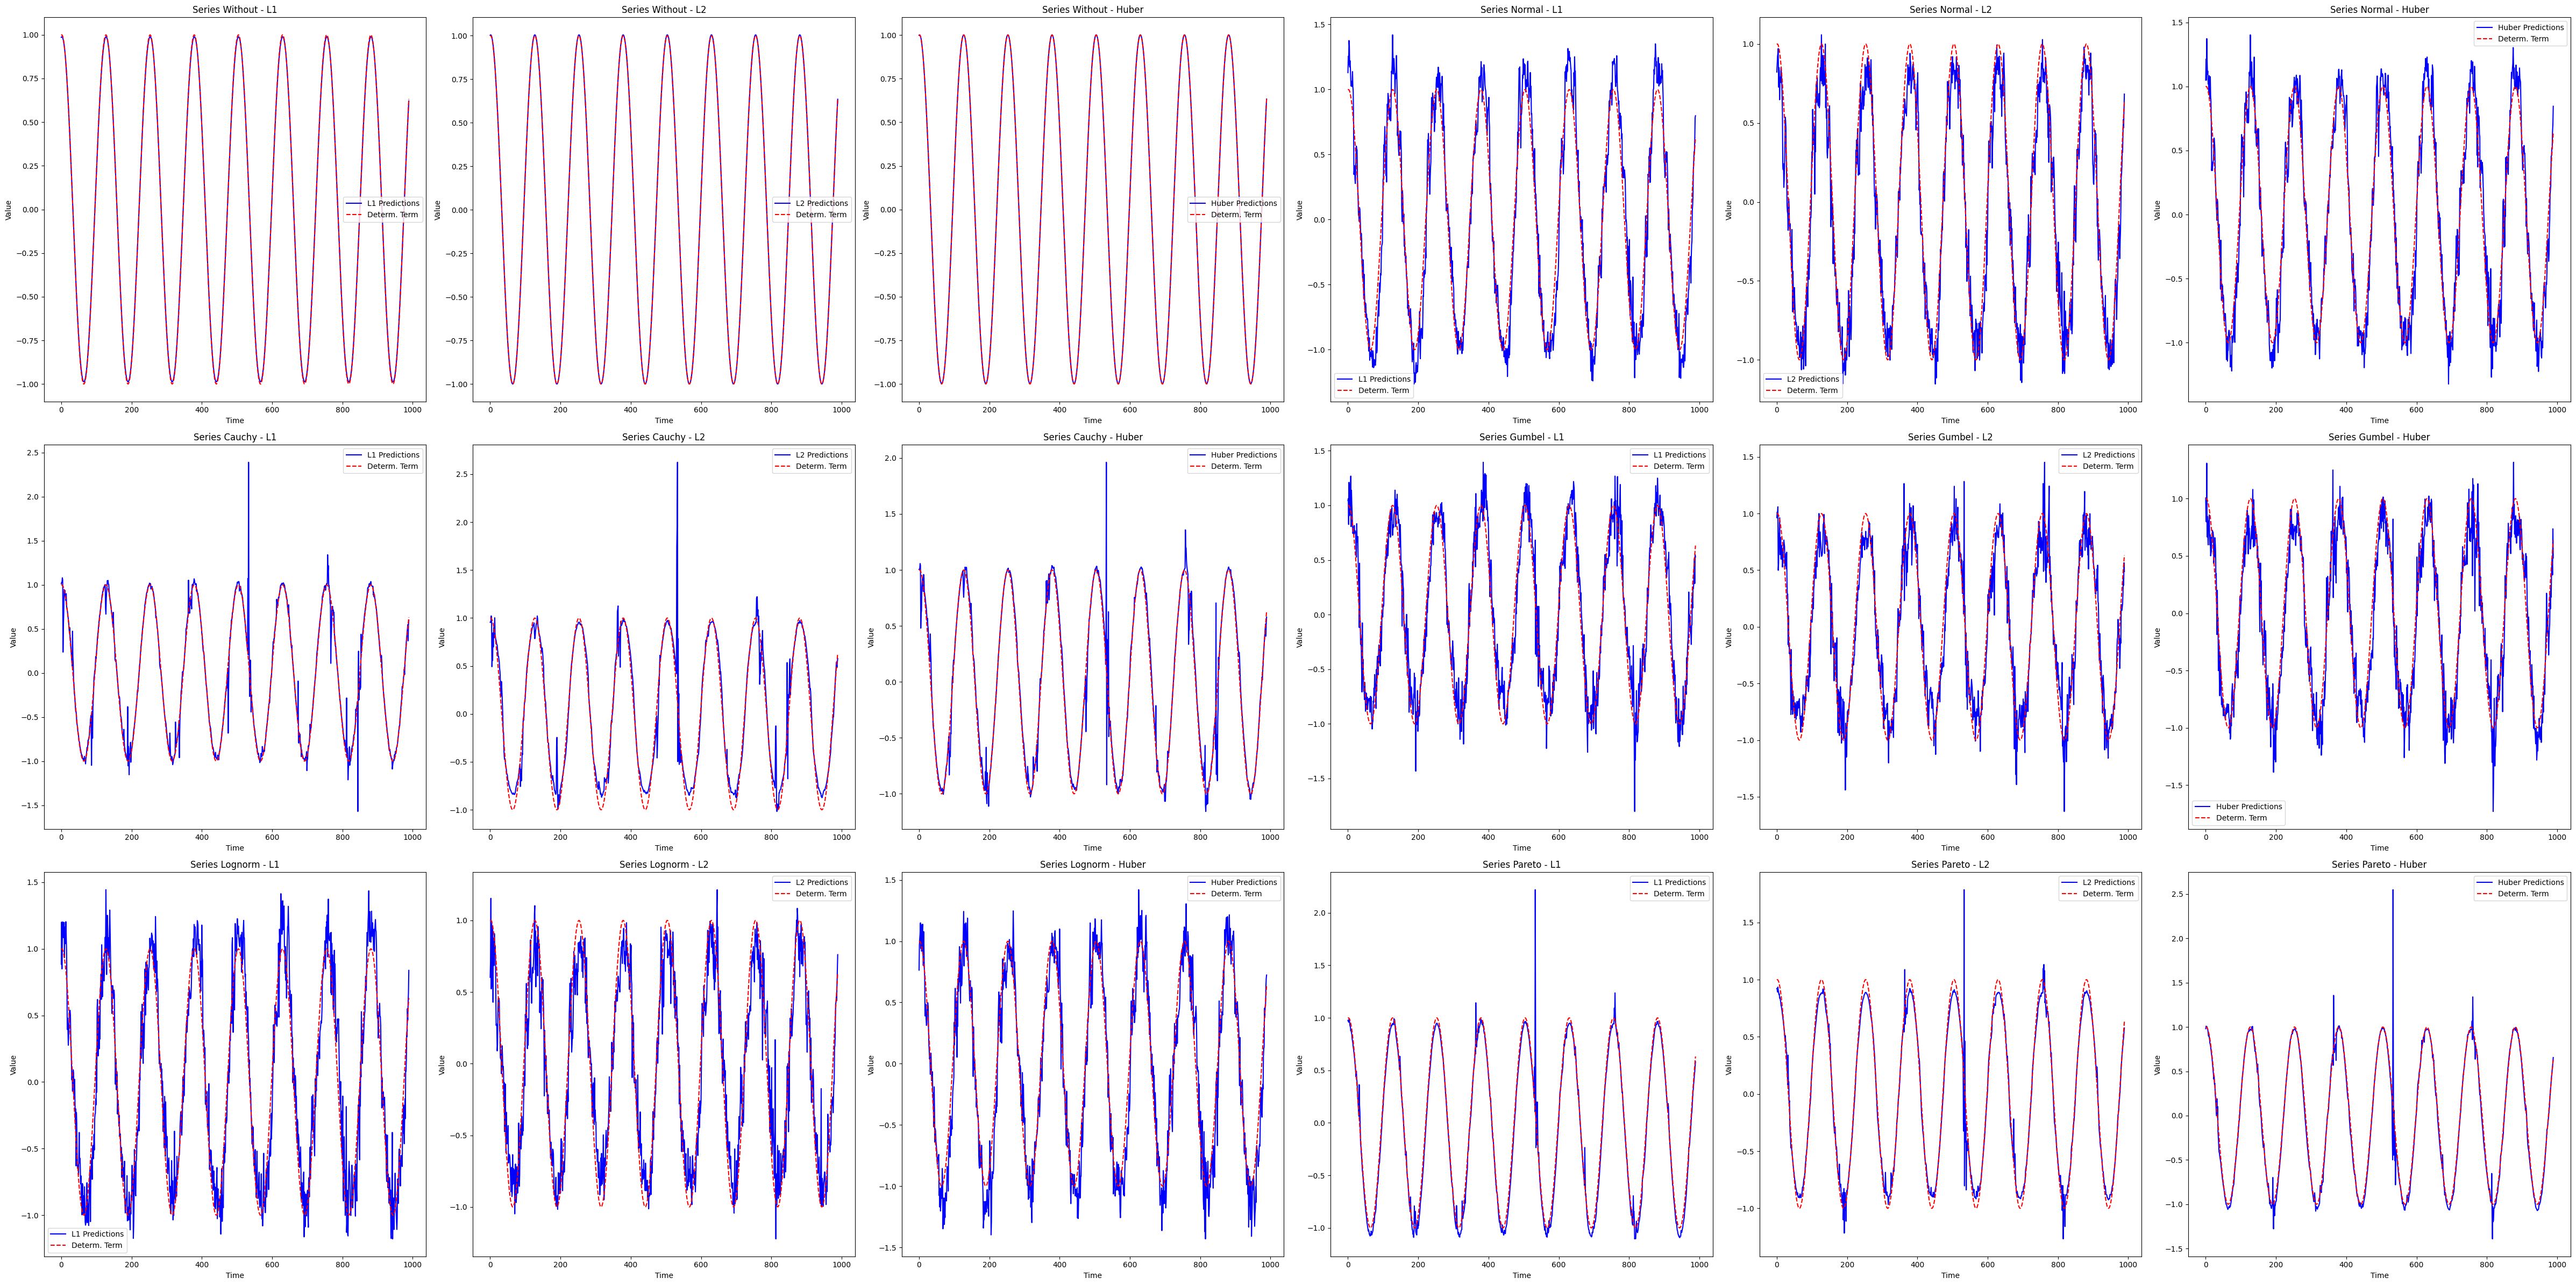

In [6]:
generate_prediction_plots(list_series, predictions_dict, loss_functions, plotter, show_figs_grid, get_series_loss, max_series=len(list_series), num_rows=3, num_cols=len(list_series))

In [7]:
names = ["Series Without", "Series Normal", "Series Cauchy","Series Gumbel", "Series Lognorm", "Series Pareto"]
series_dict = dict(zip(names, list_series))

errors_list = []

for name, ts in series_dict.items():
    for loss in ["L1","L2","Huber"]:
        errors_list.append(ts["Value"][0:len(predictions_dict[name,loss])] - predictions_dict[name,loss].flatten())

dict_dist_error = {
    "without": [ts_orig, None, "TS without noise", errors_list[0], errors_list[1], errors_list[2], True],
    "normal": [ts_norm, normal, "TS with normal noise", errors_list[3], errors_list[4], errors_list[5], True],
    "cauchy": [ts_cauchy, cauchy, "TS with cauchy noise", errors_list[6], errors_list[7], errors_list[8], False],
    "gumbel": [ts_gumbel, gumbel, "TS with gumbel noise", errors_list[9], errors_list[10], errors_list[11], True],
    "lognorm": [ts_lognorm, lognorm, "TS with lognorm noise", errors_list[12], errors_list[13], errors_list[14], True],
    "pareto": [ts_pareto, pareto, "TS with pareto noise", errors_list[15], errors_list[16], errors_list[17], True],
}

c:\Users\Iker\Desktop\Algoritmos_Perrotes\ModellingError_TS\src2\ErrorModelling4TS\ts_simulator\distributions.py:188: RuntimeWarning: invalid value encountered in log
  np.exp(-((np.log(x) - mean) ** 2) / (2 * sigma ** 2)),
c:\Users\Iker\Desktop\Algoritmos_Perrotes\ModellingError_TS\src2\ErrorModelling4TS\ts_simulator\distributions.py:188: RuntimeWarning: invalid value encountered in log
  np.exp(-((np.log(x) - mean) ** 2) / (2 * sigma ** 2)),
c:\Users\Iker\Desktop\Algoritmos_Perrotes\ModellingError_TS\src2\ErrorModelling4TS\ts_simulator\distributions.py:188: RuntimeWarning: invalid value encountered in log
  np.exp(-((np.log(x) - mean) ** 2) / (2 * sigma ** 2)),
c:\Users\Iker\Desktop\Algoritmos_Perrotes\ModellingError_TS\src2\ErrorModelling4TS\ts_simulator\distributions.py:237: RuntimeWarning: invalid value encountered in power
  x >= xm, (alpha * xm**alpha) / (x**(alpha + 1)), 0)
c:\Users\Iker\Desktop\Algoritmos_Perrotes\ModellingError_TS\src2\ErrorModelling4TS\ts_simulator\distribut

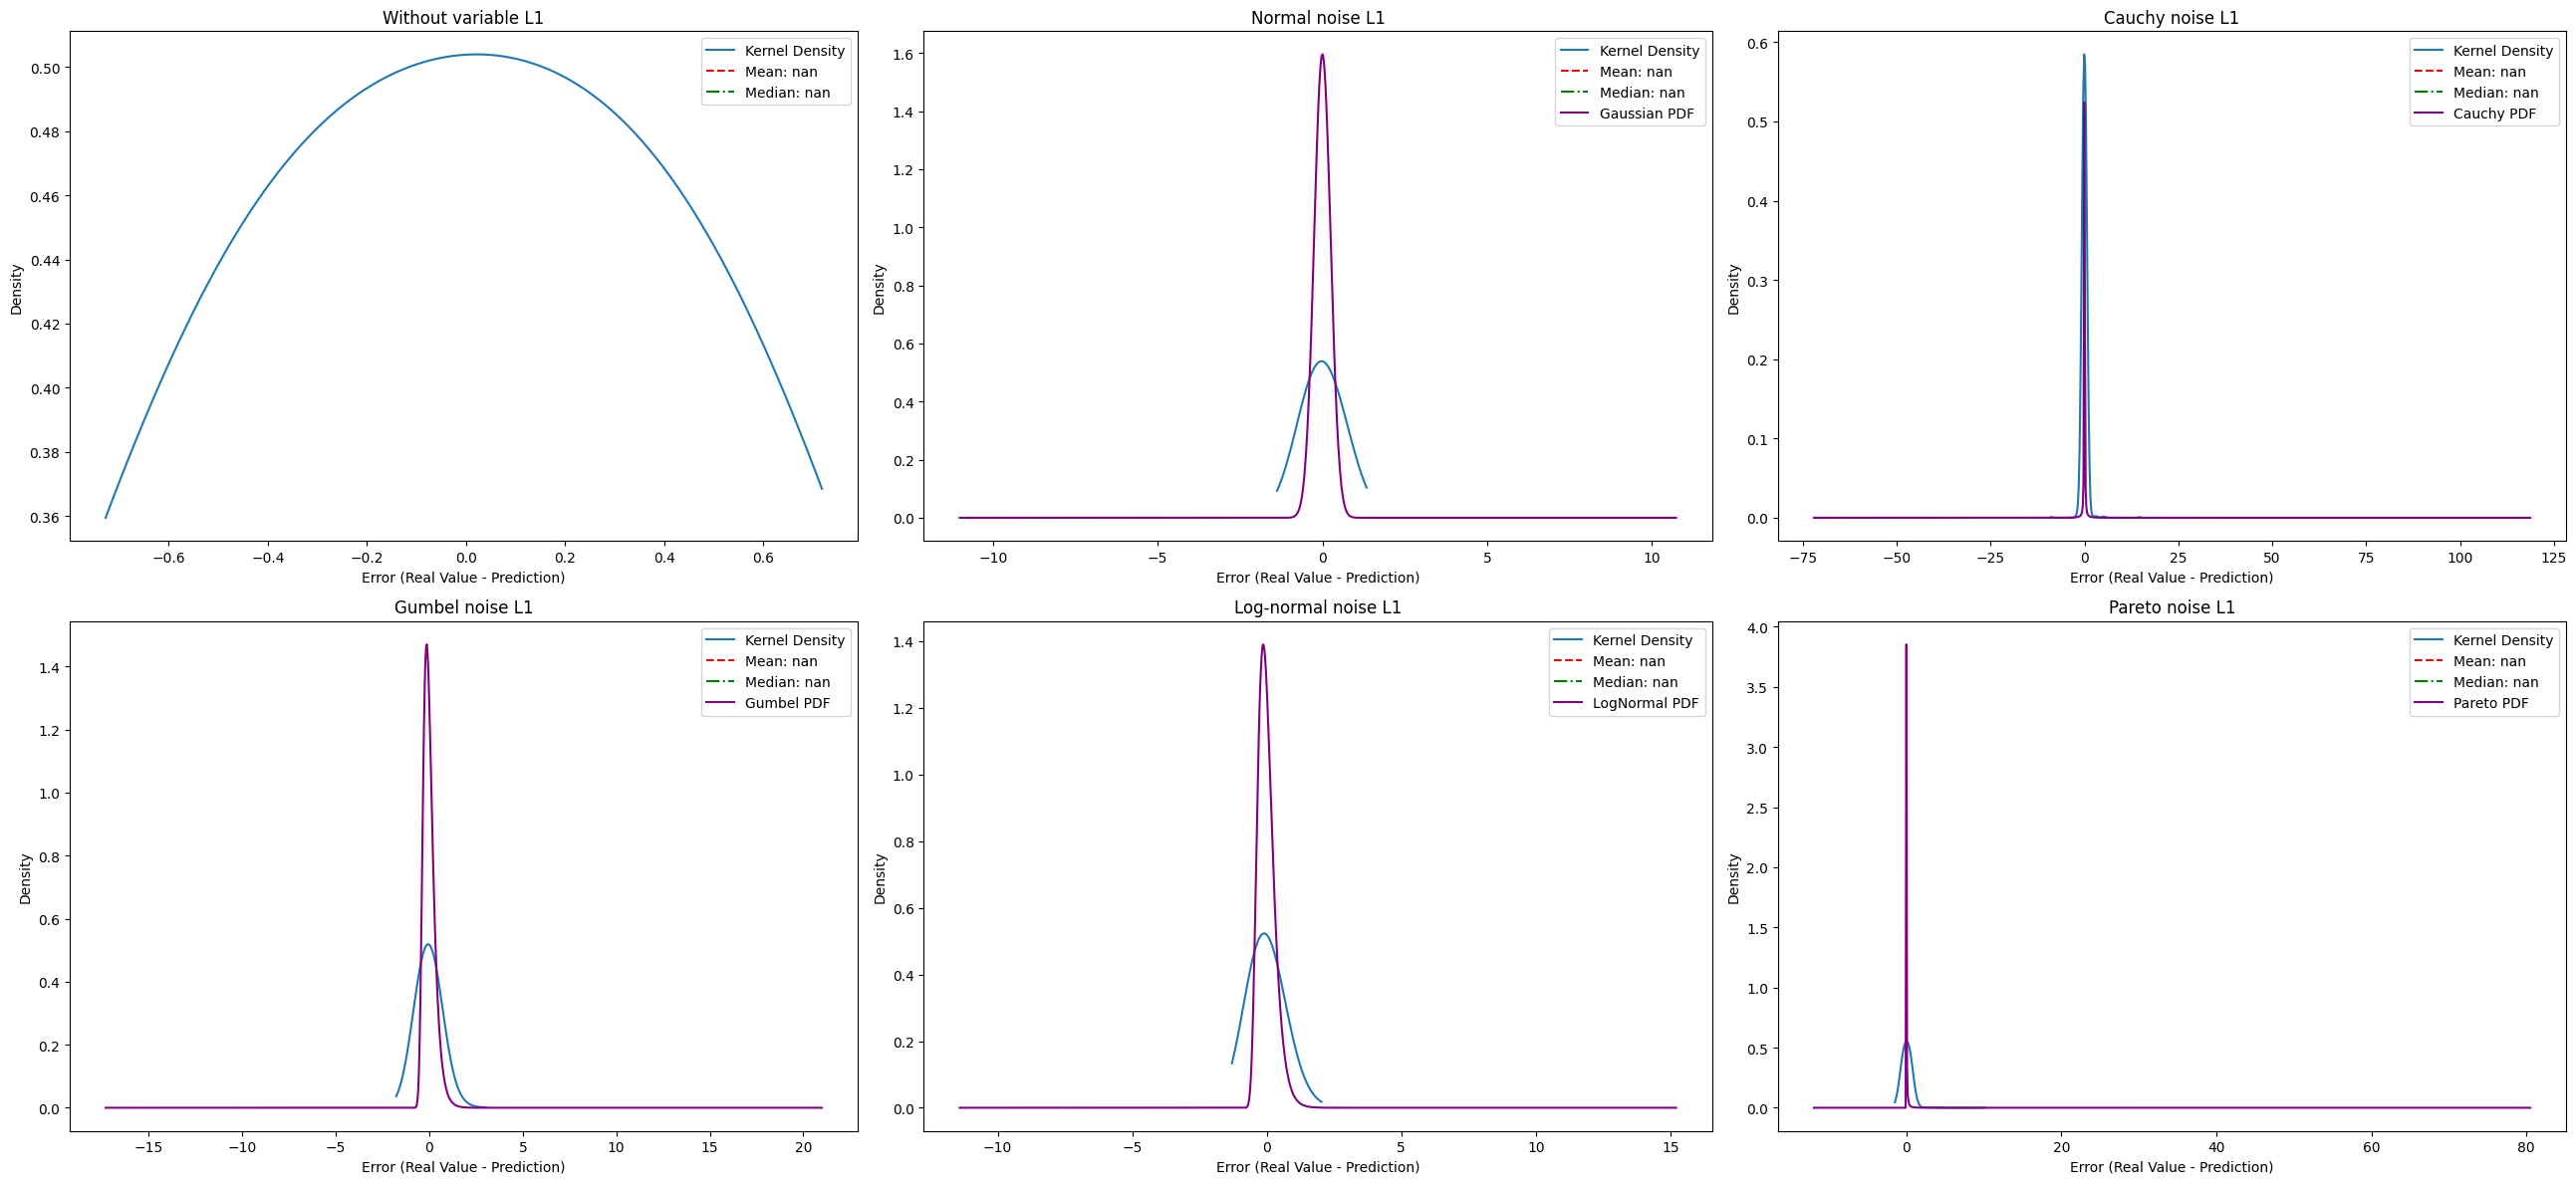

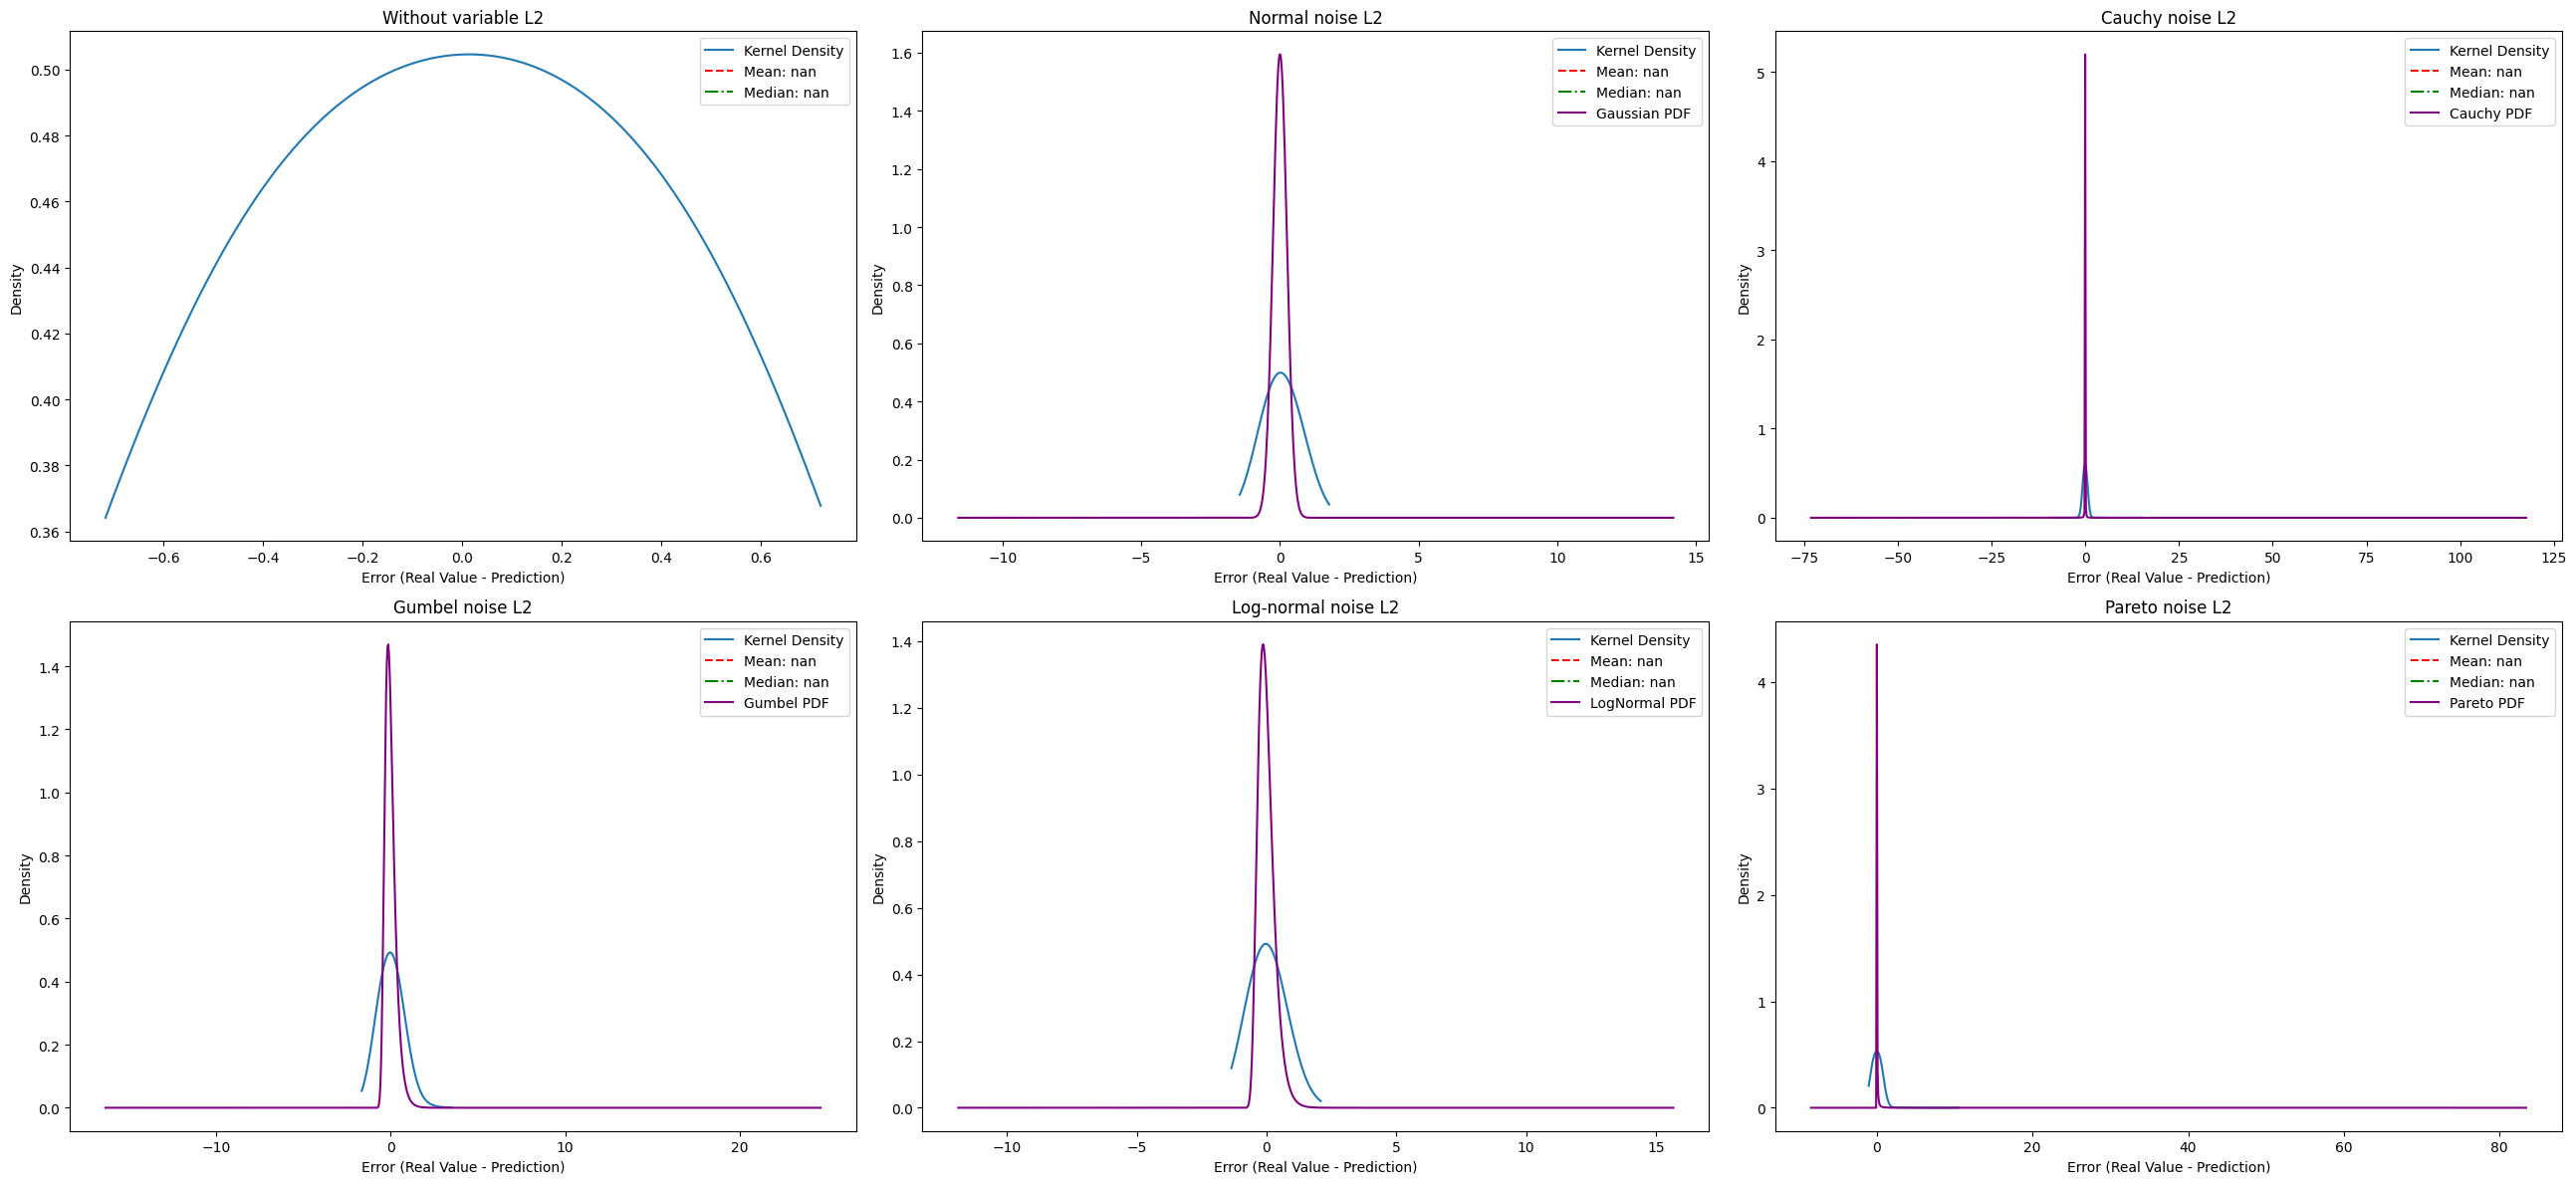

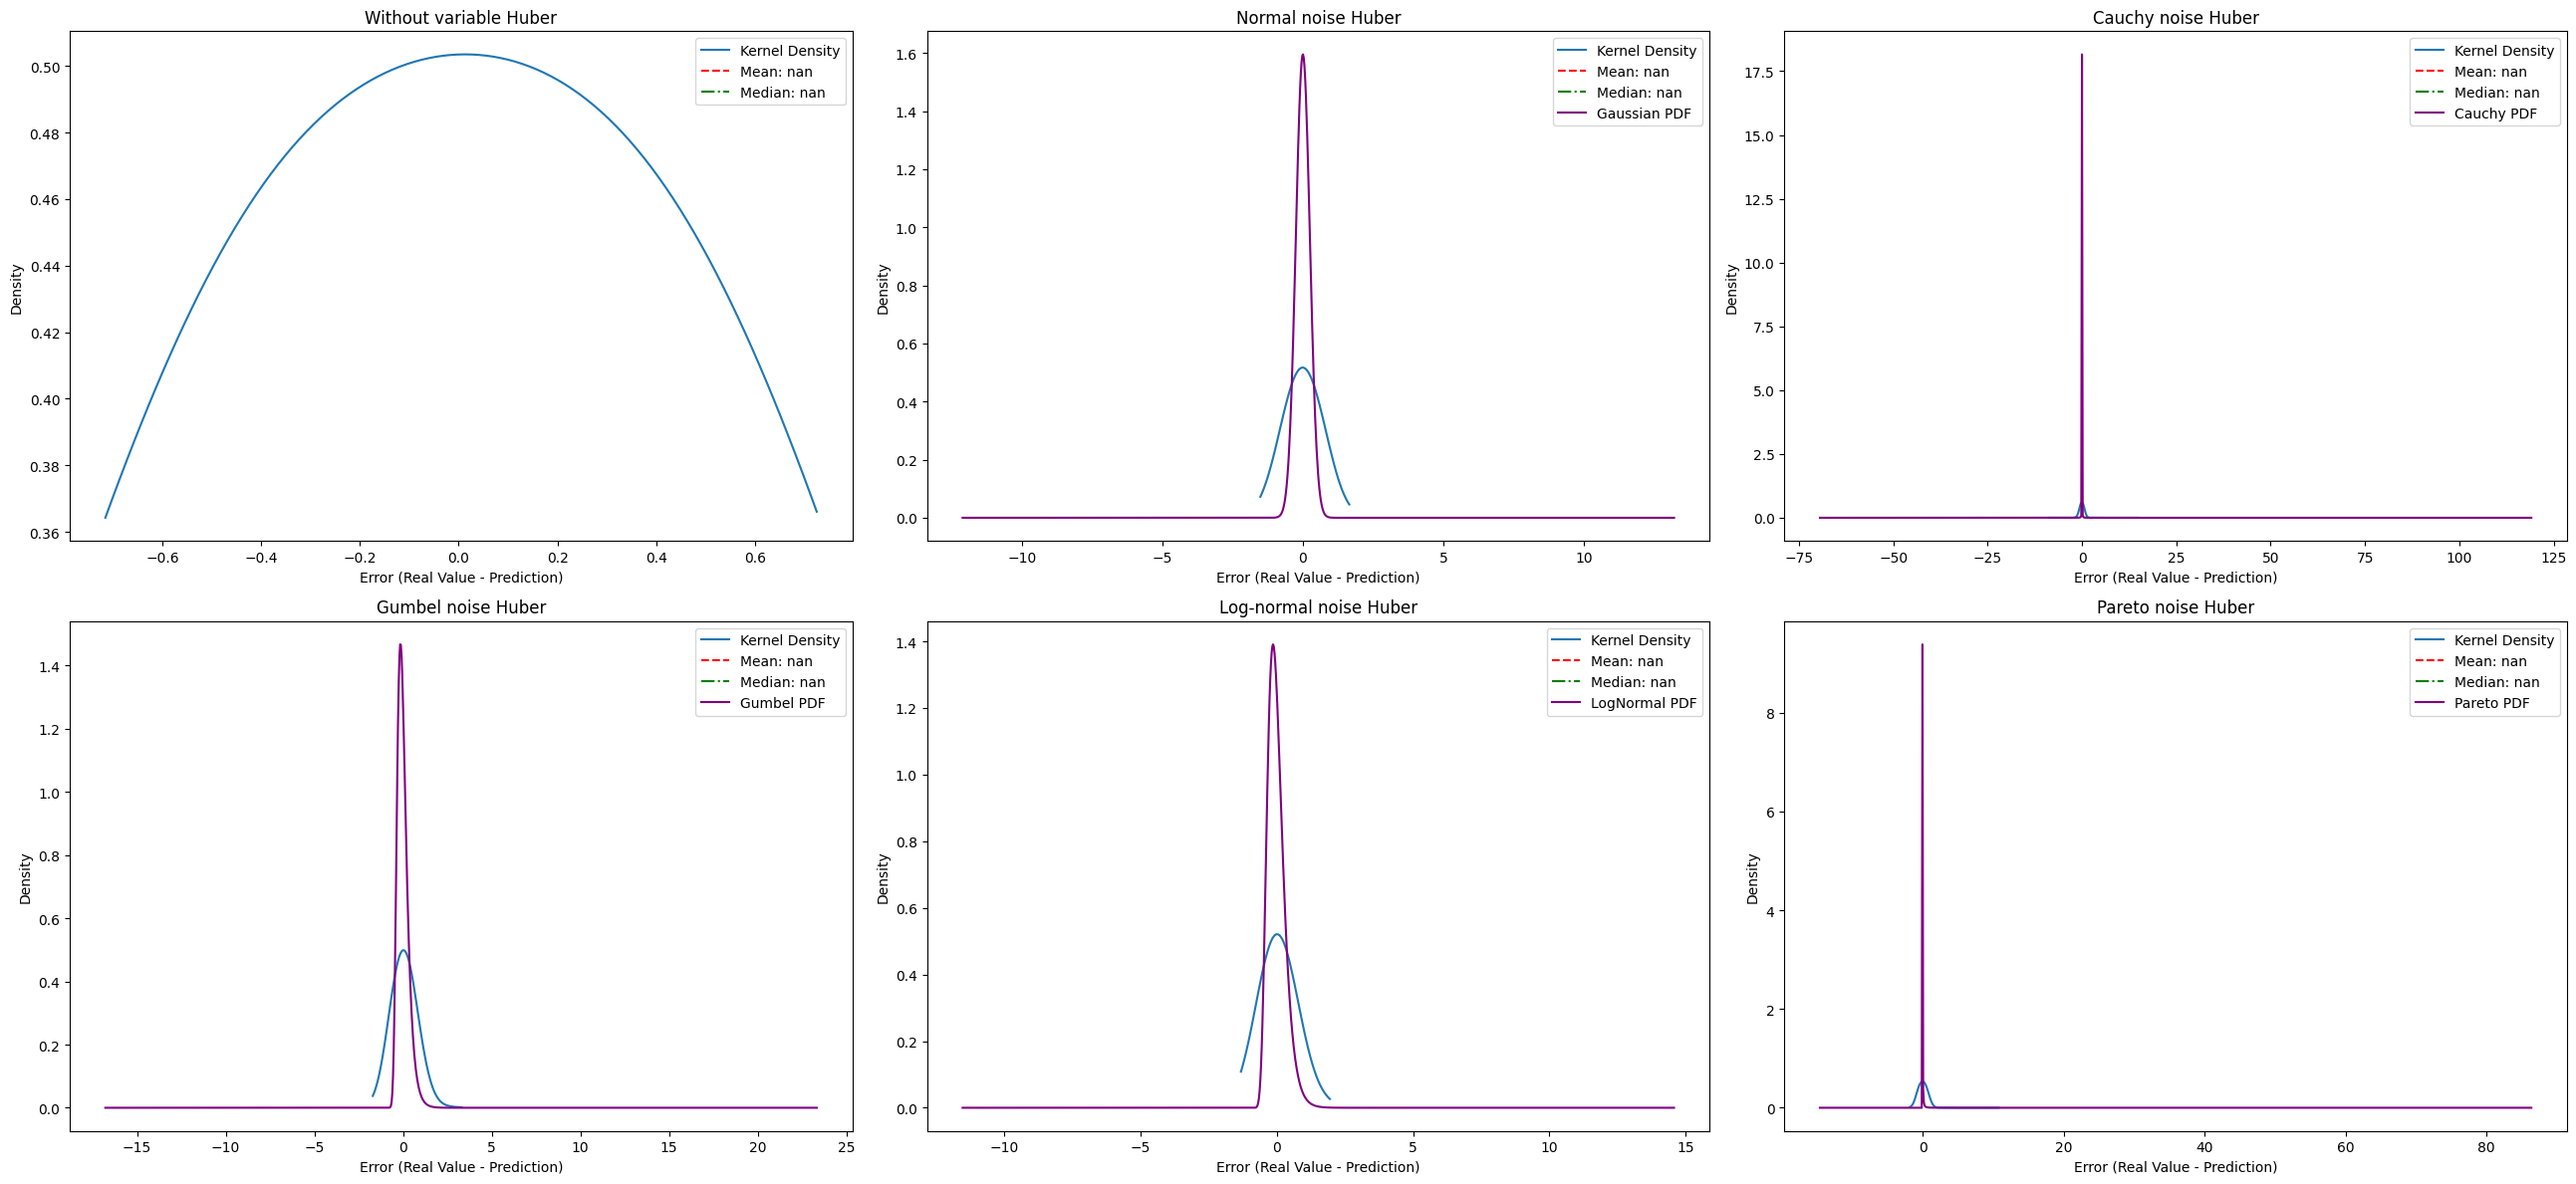

In [8]:
plots_errors_l1 = []
plots_errors_l2 = []
plots_errors_huber = []

for _, l in dict_dist_error.items():
    plots_errors_l1.append(plotter.plot_dist_error(ts_df=l[0],dist=l[1],model_name=None,errors=l[3],adjust_mean=l[6]))
    plots_errors_l2.append(plotter.plot_dist_error(ts_df=l[0],dist=l[1],model_name=None,errors=l[4],adjust_mean=l[6]))
    plots_errors_huber.append(plotter.plot_dist_error(ts_df=l[0],dist=l[1],model_name=None,errors=l[5],adjust_mean=l[6]))

show_figs_grid(plots_errors_l1,titles=["Without variable L1","Normal noise L1","Cauchy noise L1","Gumbel noise L1","Log-normal noise L1","Pareto noise L1"],fig_size=(26,12))
show_figs_grid(plots_errors_l2,titles=["Without variable L2","Normal noise L2","Cauchy noise L2","Gumbel noise L2","Log-normal noise L2","Pareto noise L2"],fig_size=(26,12))
show_figs_grid(plots_errors_huber,titles=["Without variable Huber","Normal noise Huber","Cauchy noise Huber","Gumbel noise Huber","Log-normal noise Huber","Pareto noise Huber"],fig_size=(26,12))